In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
import pandas as pd
import numpy as np

In [7]:
indicadores = pd.read_csv("Indicadores.csv")

FileNotFoundError: [Errno 2] File Indicadores.csv does not exist: 'Indicadores.csv'

In [4]:
indicadores

,cod_edo_mun,cod_estado,cod_municipio,pib_usd,idx_education,idx_health,idx_income,idx_humandev,total_pob,area,hab_km2,delitos,pop_crimes,crime_rate
0,10-1,10,1,2310.94,0.61,0.89,0.73,0.74,34485.0,3491.96,9.88,106.0,17076.0,620.75
1,10-10,10,10,1346.20,0.59,0.87,0.65,0.69,4156.0,4689.61,0.89,5.0,2274.0,219.88
2,10-11,10,11,1415.51,0.53,0.85,0.66,0.67,5347.0,2505.12,2.13,1.0,2987.0,33.48
3,10-12,10,12,2838.14,0.65,0.89,0.76,0.76,163121.0,2147.71,75.95,1007.0,74958.0,1343.42
4,10-13,10,13,2831.16,0.54,0.88,0.76,0.71,28029.0,7730.11,3.63,118.0,12148.0,971.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,9-5,9,5,3946.49,0.76,0.93,0.81,0.83,1180729.0,87.91,13431.11,12318.0,695198.0,1771.87
2414,9-6,9,6,5553.65,0.78,0.94,0.87,0.86,394448.0,23.10,17075.67,5309.0,238260.0,2228.24
2415,9-7,9,7,3699.78,0.72,0.92,0.81,0.81,1823468.0,113.16,16114.07,20131.0,989079.0,2035.33
2416,9-8,9,8,3747.39,0.73,0.92,0.81,0.81,245375.0,63.42,3869.05,1435.0,137185.0,1046.03


In [8]:
indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_edo_mun    2418 non-null   object 
 1   cod_estado     2418 non-null   int64  
 2   cod_municipio  2418 non-null   int64  
 3   pib_usd        2418 non-null   float64
 4   idx_education  2418 non-null   float64
 5   idx_health     2418 non-null   float64
 6   idx_income     2418 non-null   float64
 7   idx_humandev   2418 non-null   float64
 8   total_pob      2418 non-null   float64
 9   area           2418 non-null   float64
 10  hab_km2        2418 non-null   float64
 11  delitos        2418 non-null   float64
 12  pop_crimes     2418 non-null   float64
 13  crime_rate     2418 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 264.6+ KB


In [75]:
inmuebles = pd.read_csv("../Final_House_data2.csv")

In [10]:
inmuebles

,Filtro,Unnamed: 0,Marca,Clasificacion,Tipo,Estado,Municipio,Colonia,Colonia2,Street,...,index_right,d_cp,OBJECTID_y,CVE_ENT_y,CVE_MUN_y,CVE_LOC_y,CVE_AGEB_y,ingreso_medio,z_score,area
0,OK,0,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,Casa - Congregacion Corral de Barrancos,"Coto DEL Sauce, Congregacion Corral de Barranc...",...,93,20900,362,1,5,23.0,043A,26990.966858,-1.387693,200
1,OK,1,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Maravillas,En Venta Bonita Casa en Fracc Marcellana,"parma 126, Maravillas, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-1.725107,112
2,OK,2,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Maravillas,"Casa Nueva en El Álamo, Al Norte",", Maravillas, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.112105,245
3,OK,3,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,"Casa en Corral de Barrancos, Jesús María, Agua...",", Congregacion Corral de Barrancos, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.276697,330
4,OK,4,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,Casa - Congregacion Corral de Barrancos,"Venta Casa Nueva AL Norte EN Privada, Congrega...",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.770473,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100683,NOK,105321,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Cordemex,Departamentos de Lujo en Venta en Harmonia Yuc...,"1, Cordemex, Mérida",...,19,97110,60510,31,50,1.0,2324,34045.189101,-0.649021,0
100684,NOK,105322,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Montes de Ame,Departamento - Montes de Ame,Desarrollo DE 9 Departamentos Ubicados EN LA C...,...,19,97110,60510,31,50,1.0,2324,34045.189101,-0.852647,0
100685,OK,105324,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Fraccionamiento Colonial Chuburna,Venta Departamentos 2 Habs con Amenidades en C...,Calle 24 E Entre Calle 19 y Calle 21 Colonia C...,...,86,97215,60143,31,50,1.0,249A,23627.274055,0.117600,120
100686,OK,105325,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Fraccionamiento Colonial Chuburna,Venta Departamentos con Amenidades en Col Chub...,Calle 24 E Entre Calle 19 y Calle 21 Colonia C...,...,86,97215,60143,31,50,1.0,249A,23627.274055,0.936000,176


In [103]:
inmuebles.loc[inmuebles['Colonia2'].str.contains('Edificio')]

,Filtro,Unnamed: 0,Marca,Clasificacion,Tipo,Estado,Municipio,Colonia,Colonia2,Street,...,index_right,d_cp,OBJECTID_y,CVE_ENT_y,CVE_MUN_y,CVE_LOC_y,CVE_AGEB_y,ingreso_medio,z_score,area
109,OK,119,Inmuebles24,Casa,Venta,Quintana Roo,Cancún,Zona Hotelera,Espectacular Condo en Venta en El Edificio Más...,"Shark Tower Depto 1204, Zona Hotelera, Cancún",...,79,77500,45207,23,5,1.0,3483,12021.399173,-0.301418,188
357,OK,373,Inmuebles24,Departamento,Venta,Quintana Roo,Cancún,Puerto Juárez,Departamento de 2 Recamaras en Edificio Susten...,"Puerto Cancún, Puerto Juárez, Cancún",...,79,77500,45207,23,5,1.0,3483,12021.399173,-0.432422,121
561,OK,577,Inmuebles24,Departamento,Venta,Quintana Roo,Cancún,Zona Hotelera,Departamento de 3 Recamaras en Edificio Susten...,"Puerto Cancun, Zona Hotelera, Cancún",...,79,77500,45207,23,5,1.0,3483,12021.399173,-0.134597,224
562,OK,578,Inmuebles24,Departamento,Venta,Quintana Roo,Cancún,Zona Hotelera,Departamento de 2 Recamaras en Edificio Susten...,"Puerto Cancun, Zona Hotelera, Cancún",...,79,77500,45207,23,5,1.0,3483,12021.399173,-0.432422,121
563,OK,579,Inmuebles24,Departamento,Venta,Quintana Roo,Playa del Carmen,Vé El Tour Virtual! Entrega Inmediata en El Ce...,Departamento de 2 Recamaras en Edificio Susten...,"Puerto Cancun, Zona Hotelera, Cancún",...,79,77500,45207,23,5,1.0,3483,12021.399173,-0.432422,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92165,OK,96614,Inmuebles24,Departamento,Venta,Yucatán,Mérida,San Ramon Norte,"Departamento de 2 Habitaciones en Edificio ""To...",", San Ramon Norte, Mérida",...,264,97117,60459,31,50,1.0,1576,39827.622620,0.012928,107
92388,NOK,96845,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Montes de Ame,Venta de Departamentos Edificio Lumea 2 Recama...,Venta DE Departamentos Edificio Lumea 2 Recama...,...,55,97157,60344,31,50,1.0,530A,14735.572752,-0.259954,0
92423,NOK,96881,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Merida Centro,Departamento en Fuentes del Pedregal Edificio ...,", Merida Centro, Mérida",...,55,97157,60344,31,50,1.0,530A,14735.572752,-0.550330,0
100623,NOK,105260,Inmuebles24,Departamento,Venta,Veracruz,Veracruz,Vías Férreas,Departamentos en Venta en Edificio Estrella de...,Departamentos EN Venta EN Edificio Estrella DE...,...,204,91713,59025,30,193,1.0,608,9385.176199,0.707107,0


In [107]:
inmuebles.groupby('Tipo').count()

,Filtro,Unnamed: 0,Marca,Clasificacion,Estado,Municipio,Colonia,Colonia2,Street,Price,...,index_right,d_cp,OBJECTID_y,CVE_ENT_y,CVE_MUN_y,CVE_LOC_y,CVE_AGEB_y,ingreso_medio,z_score,area
Tipo,,,,,,,,,,,,,,,,,,,,,
Casa,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,10,12,12,12,12
Casa en condominio,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,2,3,3,3,3
Departamento,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,52,56,56,56,56
Renta,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,187,206,206,206,206
Temporal/Vacacional,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Traspaso,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
Venta,100401,100401,100401,100401,100401,100401,100401,100401,100401,100401,...,100401,100401,100401,100401,100401,83813,100401,100401,100401,100401


In [11]:
inmuebles.describe()

,Unnamed: 0,PriceClean,Price MXN,Superficie_Terreno,Superficie_Construida,Recamaras,Banos,Medio_Bano,Estacionamientos,Lat,...,Shape_Area,index_right,d_cp,OBJECTID_y,CVE_ENT_y,CVE_MUN_y,CVE_LOC_y,ingreso_medio,z_score,area
count,100688.000000,1.006880e+05,1.006880e+05,1.006880e+05,100688.000000,100688.000000,100688.000000,100688.000000,100688.000000,100688.000000,...,1.006880e+05,100688.000000,100688.000000,100688.000000,100688.000000,100688.000000,84072.000000,100688.000000,100688.000000,1.006880e+05
mean,53098.229650,4.499966e+06,5.262560e+06,7.884139e+03,0.183051,2.869816,2.583982,0.524343,1.830456,20.125307,...,1.675041e+07,551.379261,66702.241995,43847.147138,19.830437,34.480325,15.032341,22854.095138,-0.057242,7.884156e+03
std,30361.157159,1.175648e+07,1.508457e+07,1.401326e+06,7.479330,1.024250,1.207806,0.629003,1.375734,1.280749,...,6.627140e+07,665.275017,19209.297363,17695.653934,6.052515,36.185048,44.362633,15873.247536,0.668629,1.401326e+06
min,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,15.753103,...,7.850472e+03,0.000000,1000.000000,58.000000,1.000000,1.000000,1.000000,2000.000000,-2.886628,0.000000e+00
25%,26916.750000,1.665510e+06,2.100000e+06,9.000000e+01,0.000000,2.000000,2.000000,0.000000,1.000000,19.398961,...,4.395318e+05,121.000000,52930.000000,30721.000000,15.000000,9.000000,1.000000,11980.539916,-0.450781,9.000000e+01
50%,53440.500000,2.700000e+06,3.128805e+06,1.600000e+02,0.000000,3.000000,2.000000,0.000000,2.000000,20.506194,...,8.781040e+05,251.000000,63734.000000,43841.000000,18.000000,14.000000,1.000000,17445.994788,-0.080174,1.600000e+02
75%,79315.250000,4.950000e+06,5.700000e+06,2.550000e+02,0.000000,3.000000,3.000000,1.000000,2.000000,20.705741,...,2.017093e+06,710.500000,77712.000000,60219.000000,23.000000,50.000000,1.000000,29614.279805,0.088391,2.550000e+02
max,105326.000000,2.000000e+09,2.000000e+09,3.111500e+08,1200.000000,9.000000,9.000000,8.000000,9.000000,32.516754,...,3.215959e+09,2380.000000,98710.000000,80191.000000,32.000000,413.000000,1257.000000,95475.546431,2.998607,3.111500e+08


In [12]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100688 entries, 0 to 100687
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Filtro                 100688 non-null  object 
 1   Unnamed: 0             100688 non-null  int64  
 2   Marca                  100688 non-null  object 
 3   Clasificacion          100688 non-null  object 
 4   Tipo                   100688 non-null  object 
 5   Estado                 100688 non-null  object 
 6   Municipio              100688 non-null  object 
 7   Colonia                100688 non-null  object 
 8   Colonia2               100688 non-null  object 
 9   Street                 100688 non-null  object 
 10  Price                  100688 non-null  object 
 11  Moneda                 100688 non-null  object 
 12  PriceClean             100688 non-null  int64  
 13  Price MXN              100688 non-null  float64
 14  Superficie_Terreno     100688 non-nu

In [13]:
inmuebles

,Filtro,Unnamed: 0,Marca,Clasificacion,Tipo,Estado,Municipio,Colonia,Colonia2,Street,...,index_right,d_cp,OBJECTID_y,CVE_ENT_y,CVE_MUN_y,CVE_LOC_y,CVE_AGEB_y,ingreso_medio,z_score,area
0,OK,0,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,Casa - Congregacion Corral de Barrancos,"Coto DEL Sauce, Congregacion Corral de Barranc...",...,93,20900,362,1,5,23.0,043A,26990.966858,-1.387693,200
1,OK,1,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Maravillas,En Venta Bonita Casa en Fracc Marcellana,"parma 126, Maravillas, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-1.725107,112
2,OK,2,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Maravillas,"Casa Nueva en El Álamo, Al Norte",", Maravillas, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.112105,245
3,OK,3,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,"Casa en Corral de Barrancos, Jesús María, Agua...",", Congregacion Corral de Barrancos, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.276697,330
4,OK,4,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,Casa - Congregacion Corral de Barrancos,"Venta Casa Nueva AL Norte EN Privada, Congrega...",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.770473,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100683,NOK,105321,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Cordemex,Departamentos de Lujo en Venta en Harmonia Yuc...,"1, Cordemex, Mérida",...,19,97110,60510,31,50,1.0,2324,34045.189101,-0.649021,0
100684,NOK,105322,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Montes de Ame,Departamento - Montes de Ame,Desarrollo DE 9 Departamentos Ubicados EN LA C...,...,19,97110,60510,31,50,1.0,2324,34045.189101,-0.852647,0
100685,OK,105324,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Fraccionamiento Colonial Chuburna,Venta Departamentos 2 Habs con Amenidades en C...,Calle 24 E Entre Calle 19 y Calle 21 Colonia C...,...,86,97215,60143,31,50,1.0,249A,23627.274055,0.117600,120
100686,OK,105325,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Fraccionamiento Colonial Chuburna,Venta Departamentos con Amenidades en Col Chub...,Calle 24 E Entre Calle 19 y Calle 21 Colonia C...,...,86,97215,60143,31,50,1.0,249A,23627.274055,0.936000,176


In [14]:
(inmuebles == 0).astype(int).sum(axis=0)

Filtro                        0
Unnamed: 0                    1
Marca                         0
Clasificacion                 0
Tipo                          0
Estado                        0
Municipio                     0
Colonia                       0
Colonia2                      0
Street                        0
Price                         0
Moneda                        0
PriceClean                    0
Price MXN                     0
Superficie_Terreno        11739
Superficie_Construida    100597
Recamaras                  2308
Banos                      2112
Medio_Bano                53595
Estacionamientos          17366
CordA                         0
URL                           0
Lat                           0
Lon                           0
geometry                      0
OBJECTID_x                    0
CVEGEO                        0
CVE_ENT_x                     0
CVE_MUN_x                     0
CVE_LOC_x                     0
CVE_AGEB_x                    0
Ambito  

In [17]:
inmuebles_2 = inmuebles.copy()

In [16]:
#inmuebles_2["area"] = np.where((inmuebles_2["Superficie_Terreno"] > inmuebles_2["Superficie_Construida"])
#                     ,inmuebles_2["Superficie_Terreno"], inmuebles_2["Superficie_Construida"])

In [18]:
inmuebles_2.iloc[0]

Filtro                                                                  OK
Unnamed: 0                                                               0
Marca                                                          Inmuebles24
Clasificacion                                                         Casa
Tipo                                                                 Venta
Estado                                                      Aguascalientes
Municipio                                                      Jesús María
Colonia                                   Congregacion Corral de Barrancos
Colonia2                           Casa - Congregacion Corral de Barrancos
Street                   Coto DEL Sauce, Congregacion Corral de Barranc...
Price                                                         MN 1,850,000
Moneda                                                                 MN 
PriceClean                                                         1850000
Price MXN                

In [19]:
dataset1 = inmuebles_2.loc[inmuebles_2['Filtro']=="OK"]

In [20]:
dataset1

,Filtro,Unnamed: 0,Marca,Clasificacion,Tipo,Estado,Municipio,Colonia,Colonia2,Street,...,index_right,d_cp,OBJECTID_y,CVE_ENT_y,CVE_MUN_y,CVE_LOC_y,CVE_AGEB_y,ingreso_medio,z_score,area
0,OK,0,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,Casa - Congregacion Corral de Barrancos,"Coto DEL Sauce, Congregacion Corral de Barranc...",...,93,20900,362,1,5,23.0,043A,26990.966858,-1.387693,200
1,OK,1,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Maravillas,En Venta Bonita Casa en Fracc Marcellana,"parma 126, Maravillas, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-1.725107,112
2,OK,2,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Maravillas,"Casa Nueva en El Álamo, Al Norte",", Maravillas, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.112105,245
3,OK,3,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,"Casa en Corral de Barrancos, Jesús María, Agua...",", Congregacion Corral de Barrancos, Jesús María",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.276697,330
4,OK,4,Inmuebles24,Casa,Venta,Aguascalientes,Jesús María,Congregacion Corral de Barrancos,Casa - Congregacion Corral de Barrancos,"Venta Casa Nueva AL Norte EN Privada, Congrega...",...,93,20900,362,1,5,23.0,043A,26990.966858,-0.770473,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100670,OK,105308,Inmuebles24,Departamento,Venta,Yucatán,Dzemul,San Benito,Venta Enorme Departamento con Alberca Frente A...,Venta Enorme Departamento con Alberca Frente a...,...,368,97404,59904,31,26,1.0,55,14578.555900,1.349310,3800
100673,OK,105311,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Fraccionamiento Montebello,Aria Townhouses | Último Disponible!,"Aria | Townhouses, Fraccionamiento Montebello,...",...,222,79355,74568,24,10,NaN,125,5850.449865,-0.707107,120
100685,OK,105324,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Fraccionamiento Colonial Chuburna,Venta Departamentos 2 Habs con Amenidades en C...,Calle 24 E Entre Calle 19 y Calle 21 Colonia C...,...,86,97215,60143,31,50,1.0,249A,23627.274055,0.117600,120
100686,OK,105325,Inmuebles24,Departamento,Venta,Yucatán,Mérida,Fraccionamiento Colonial Chuburna,Venta Departamentos con Amenidades en Col Chub...,Calle 24 E Entre Calle 19 y Calle 21 Colonia C...,...,86,97215,60143,31,50,1.0,249A,23627.274055,0.936000,176


In [21]:
final_dataset = pd.merge(dataset1, indicadores, left_on=['CVE_ENT_x', 'CVE_MUN_x'], right_on=['cod_estado', 'cod_municipio'])

In [150]:
final_dataset.describe()

,Unnamed: 0,PriceClean,Price MXN,Superficie_Terreno,Superficie_Construida,Recamaras,Banos,Medio_Bano,Estacionamientos,Lat,...,idx_education,idx_health,idx_income,idx_humandev,total_pob,area_y,hab_km2,delitos,pop_crimes,crime_rate
count,86390.000000,8.639000e+04,8.639000e+04,8.639000e+04,86390.000000,86390.000000,86390.000000,86390.000000,86390.000000,86390.000000,...,86390.000000,86390.000000,86390.000000,86390.000000,8.639000e+04,86390.000000,86390.000000,86390.000000,86390.000000,86390.000000
mean,52486.714886,4.715836e+06,5.385922e+06,9.184690e+03,0.212189,2.978805,2.699016,0.551846,1.923625,20.131659,...,0.711724,0.911226,0.812105,0.806500,5.840918e+05,656.825559,2149.246998,7505.620037,352319.194270,2171.044986
std,30492.470402,1.056857e+07,1.464805e+07,1.512848e+06,8.067043,0.976771,1.190614,0.639804,1.408563,1.247486,...,0.058218,0.028621,0.035084,0.038284,4.025953e+05,841.300999,2690.329277,7437.654065,247824.116845,1100.271856
min,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,15.753103,...,0.470000,0.630000,0.600000,0.600000,1.901000e+03,4.690000,1.900000,0.000000,1310.000000,0.000000
25%,25728.250000,1.880000e+06,2.193250e+06,1.200000e+02,0.000000,3.000000,2.000000,0.000000,1.000000,19.395901,...,0.670000,0.900000,0.790000,0.790000,2.159320e+05,140.880000,687.140000,1927.000000,135152.000000,1472.430000
50%,51935.500000,2.850000e+06,3.190000e+06,1.900000e+02,0.000000,3.000000,3.000000,0.000000,2.000000,20.505110,...,0.730000,0.920000,0.820000,0.820000,5.533450e+05,673.990000,1228.000000,3370.000000,295171.000000,2282.070000
75%,77530.750000,5.200000e+06,5.850500e+06,2.920000e+02,0.000000,3.000000,3.000000,1.000000,2.000000,20.713573,...,0.760000,0.920000,0.830000,0.830000,9.528030e+05,883.440000,2034.220000,12164.000000,650450.000000,3100.620000
max,105326.000000,1.990000e+09,1.990000e+09,3.111500e+08,1200.000000,9.000000,9.000000,8.000000,9.000000,32.516754,...,0.910000,0.970000,0.950000,0.940000,1.823468e+06,16955.160000,17891.200000,33413.000000,989079.000000,5168.900000


In [23]:
final_dataset.columns

Index(['Filtro', 'Unnamed: 0', 'Marca', 'Clasificacion', 'Tipo', 'Estado',
       'Municipio', 'Colonia', 'Colonia2', 'Street', 'Price', 'Moneda',
       'PriceClean', 'Price MXN', 'Superficie_Terreno',
       'Superficie_Construida', 'Recamaras', 'Banos', 'Medio_Bano',
       'Estacionamientos', 'CordA', 'URL', 'Lat', 'Lon', 'geometry',
       'OBJECTID_x', 'CVEGEO', 'CVE_ENT_x', 'CVE_MUN_x', 'CVE_LOC_x',
       'CVE_AGEB_x', 'Ambito', 'Shape_Leng', 'Shape_Area', 'index_right',
       'd_cp', 'OBJECTID_y', 'CVE_ENT_y', 'CVE_MUN_y', 'CVE_LOC_y',
       'CVE_AGEB_y', 'ingreso_medio', 'z_score', 'area_x', 'cod_edo_mun',
       'cod_estado', 'cod_municipio', 'pib_usd', 'idx_education', 'idx_health',
       'idx_income', 'idx_humandev', 'total_pob', 'area_y', 'hab_km2',
       'delitos', 'pop_crimes', 'crime_rate'],
      dtype='object')

In [24]:
final_dataset_model = final_dataset[['Price MXN', 'Recamaras', 'Banos', 'Medio_Bano',
                              'Estacionamientos','ingreso_medio' , 'Superficie_Terreno',
                              'area_x', 'crime_rate','idx_education', 'idx_health',
       'idx_income', 'idx_humandev','hab_km2']]

In [175]:
final_data_model = final_dataset_model.loc[(final_dataset_model['area_x']<800) & (final_dataset_model['Price MXN']<10000000)]

In [155]:
final_data_model.describe()

,Price MXN,Recamaras,Banos,Medio_Bano,Estacionamientos,ingreso_medio,Superficie_Terreno,area_x,crime_rate,idx_education,idx_health,idx_income,idx_humandev,hab_km2
count,7.812600e+04,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000,78126.000000
mean,3.876829e+06,2.909467,2.575135,0.523283,1.761488,22574.057013,210.225636,210.248035,2149.855050,0.711658,0.911121,0.812227,0.806428,2119.213633
std,2.928582e+06,0.909095,1.076685,0.599746,1.189617,16018.359155,141.480845,141.483676,1125.384204,0.058374,0.028864,0.034511,0.038203,2706.487167
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,50.000000,0.000000,0.470000,0.740000,0.600000,0.600000,1.900000
25%,2.050000e+06,3.000000,2.000000,0.000000,1.000000,11979.598943,116.000000,116.000000,1407.530000,0.670000,0.900000,0.790000,0.790000,687.140000
50%,2.900000e+06,3.000000,3.000000,0.000000,2.000000,17250.311491,171.000000,171.000000,2282.070000,0.730000,0.920000,0.820000,0.820000,1228.000000
75%,4.850000e+06,3.000000,3.000000,1.000000,2.000000,29081.556036,242.000000,242.000000,3100.620000,0.760000,0.920000,0.830000,0.830000,2034.220000
max,1.500000e+07,9.000000,9.000000,8.000000,9.000000,95475.546431,898.000000,898.000000,5168.900000,0.910000,0.970000,0.950000,0.940000,17891.200000


In [101]:
prices = final_dataset_model.loc[final_dataset_model['Price MXN']<10000000]

In [113]:
area = final_dataset_model.loc[final_dataset_model['area_x']<1000]

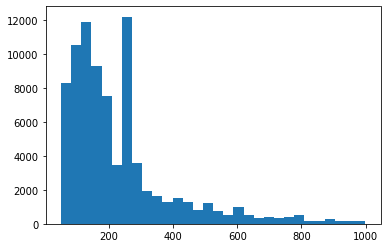

In [115]:
plt.hist(area['area_x'], bins=30)
plt.show()

In [86]:
columnas = ['Price MXN', 'Recamaras', 'Banos', 'Medio_Bano',
                              'Estacionamientos','ingreso_medio' , 'Superficie_Terreno',
                              'area_x', 'crime_rate','idx_education', 'idx_health',
       'idx_income', 'idx_humandev','hab_km2']

In [91]:
def outliers(column):
    quartiles = final_dataset_model[column].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {column} is: {lowerq}")
    print(f"The upper quartile of {column} is: {upperq}")
    print(f"The interquartile range of {column} is: {iqr}")
    print(f"The the median of {column} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (3*iqr)
    upper_bound = upperq + (3*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

In [92]:
outliers('Recamaras')

The lower quartile of Recamaras is: 3.0
The upper quartile of Recamaras is: 3.0
The interquartile range of Recamaras is: 0.0
The the median of Recamaras is: 3.0 
Values below 3.0 could be outliers.
Values above 3.0 could be outliers.


In [93]:
outliers('Banos')

The lower quartile of Banos is: 2.0
The upper quartile of Banos is: 3.0
The interquartile range of Banos is: 1.0
The the median of Banos is: 3.0 
Values below -1.0 could be outliers.
Values above 6.0 could be outliers.


In [94]:
for column in columnas:
    outliers(column)
    print("----------------")

The lower quartile of Price MXN is: 2193250.0
The upper quartile of Price MXN is: 5850500.0
The interquartile range of Price MXN is: 3657250.0
The the median of Price MXN is: 3190000.0 
Values below -8778500.0 could be outliers.
Values above 16822250.0 could be outliers.
----------------
The lower quartile of Recamaras is: 3.0
The upper quartile of Recamaras is: 3.0
The interquartile range of Recamaras is: 0.0
The the median of Recamaras is: 3.0 
Values below 3.0 could be outliers.
Values above 3.0 could be outliers.
----------------
The lower quartile of Banos is: 2.0
The upper quartile of Banos is: 3.0
The interquartile range of Banos is: 1.0
The the median of Banos is: 3.0 
Values below -1.0 could be outliers.
Values above 6.0 could be outliers.
----------------
The lower quartile of Medio_Bano is: 0.0
The upper quartile of Medio_Bano is: 1.0
The interquartile range of Medio_Bano is: 1.0
The the median of Medio_Bano is: 0.0 
Values below -3.0 could be outliers.
Values above 4.0 coul

In [ ]:
#X = final_dataset_model[['Recamaras', 'Banos', 'Medio_Bano',
#                              'Estacionamientos','ingreso_medio' ,
#                              'area_x', 'crime_rate','idx_education', 'idx_health',
#       'idx_income', 'idx_humandev','hab_km2']]


In [197]:
X = final_data_model[['Recamaras', 'Banos',
                              'Estacionamientos','ingreso_medio' ,
                              'area_x', 'crime_rate','idx_education', 'idx_health',
       'idx_income', 'idx_humandev']]

In [166]:
X = final_data_model[['Recamaras', 'Banos',
                              'Estacionamientos',
                              'area_x']]

In [198]:
y = final_data_model['Price MXN'].values.reshape(-1, 1)

In [199]:
X['area_x'].replace(0,X['area_x'].median(), inplace=True)
X['Recamaras'].replace(0,X['Recamaras'].median(), inplace=True)
X['Banos'].replace(0,X['Banos'].median(), inplace=True)
X['Estacionamientos'].replace(0,X['Estacionamientos'].median(),inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(ne

In [200]:
(X == 0).astype(int).sum(axis=0)

Recamaras            0
Banos                0
Estacionamientos     0
ingreso_medio        0
area_x               0
crime_rate          65
idx_education        0
idx_health           0
idx_income           0
idx_humandev         0
dtype: int64

In [201]:
X['crime_rate'].replace(0,X['crime_rate'].median(),inplace=True)

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [203]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [204]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Random forest

In [205]:
import matplotlib.pyplot as plt

In [206]:
from sklearn.ensemble import RandomForestRegressor

In [207]:
model_1 = RandomForestRegressor(max_depth=5, random_state=42)
model_1.fit(X_train_scaled, y_train_scaled.ravel())
model_1.score(X_test_scaled, y_test_scaled)

0.5132601667148626

In [70]:
predictions = model_1.predict(X_test_scaled)

In [109]:
predict = y_scaler.inverse_transform(predictions)

In [111]:
predict[np.where(predict<0)]

array([], dtype=float64)

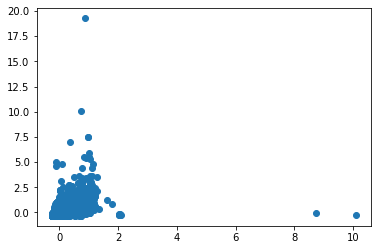

In [71]:
plt.scatter(predictions, y_test_scaled)
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predictions, y_test_scaled))

0.31546915298339256

In [74]:
y_scaler.inverse_transform([np.sqrt(mean_squared_error(predictions, y_test_scaled))])

array([10628747.26723833])

## SVM

In [71]:
from sklearn.svm import SVR

In [ ]:
model_2 = SVR(kernel='linear', C=100, gamma='auto')
model_2.fit(X_train_scaled, y_train_scaled.ravel())
model_2.score(X_test_scaled, y_test_scaled)

## Gradient Boosting

In [38]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
from sklearn import ensemble

In [186]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [187]:
model_3 = ensemble.GradientBoostingRegressor(**params)
model_3.fit(X_train_scaled, y_train_scaled.ravel())
model_3.score(X_test_scaled, y_test_scaled)

0.6544104543217542

In [188]:
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train_scaled, y_train_scaled.ravel())
reg.score(X_test_scaled, y_test_scaled)

0.652362993094201

In [189]:
predictions = model_3.predict(X_test_scaled)

In [190]:
np.sqrt(mean_squared_error(predictions, y_test_scaled))

0.5845346129541313

In [191]:
y_scaler.inverse_transform([np.sqrt(mean_squared_error(predictions, y_test_scaled))])

array([4562686.9353506])

In [192]:
X.describe()

,Recamaras,Banos,Estacionamientos,ingreso_medio,area_x,crime_rate,idx_education,idx_health,idx_income,idx_humandev,hab_km2
count,73259.000000,73259.000000,73259.000000,73259.000000,73259.00000,73259.000000,73259.000000,73259.000000,73259.000000,73259.000000,73259.000000
mean,2.930234,2.539852,2.034822,21900.584917,195.12004,2140.426935,0.711163,0.910883,0.811915,0.806071,2070.274971
std,0.811144,1.010688,0.807482,15700.182123,121.63628,1141.502514,0.058760,0.029316,0.034538,0.038543,2689.928700
min,1.000000,1.000000,1.000000,2000.000000,50.00000,71.120000,0.470000,0.750000,0.600000,0.600000,1.900000
25%,3.000000,2.000000,2.000000,11590.116575,112.00000,1333.760000,0.670000,0.900000,0.790000,0.780000,687.140000
50%,3.000000,2.000000,2.000000,16756.186422,162.00000,2282.070000,0.730000,0.920000,0.820000,0.820000,1228.000000
75%,3.000000,3.000000,2.000000,27587.588586,242.00000,3100.620000,0.760000,0.920000,0.830000,0.830000,1984.870000
max,9.000000,9.000000,9.000000,95475.546431,799.00000,5168.900000,0.910000,0.970000,0.950000,0.940000,17891.200000
